# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warning
import warnings
warnings.filterwarnings('ignore')


# Set option max columns display
pd.set_option('max_colwidth', 550)
pd.set_option('max_info_rows', 500)


import re # regular expression library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/erlandoregita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Dataset Overview

In [2]:
# quoting parameter will avoid any issue related to double quotes in reviews text
# code to ignore double quotes is value 3 

df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [56]:
print(f'Dataset contains of {df.shape[0]} Rows')

Dataset contains of 1000 Rows


# Data Exploration

## Univariate - Target Feature

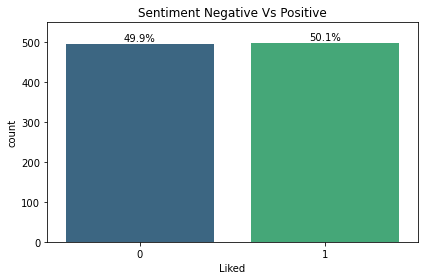

In [16]:
atrate = sns.countplot(df['Liked'], palette='viridis')
total = len(df)
for p in atrate.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    atrate.annotate(percentage, (x, y), ha='center', va='center')
plt.title('Sentiment Negative Vs Positive')
plt.tight_layout()
plt.ylim(0,550)
plt.show()

In [45]:
pos = df[df['Liked'] == 1]
neg = df[df['Liked'] == 0]

print(f'Num of Posiive Sentiment : {len(pos)}')
print(f'Num of Negative Sentiment : {len(neg)}')

Num of Posiive Sentiment : 500
Num of Negative Sentiment : 500


## Word Cloud

### Positve Sentiment

In [23]:
stopwords=set(STOPWORDS)
tot_text_pos=(''.join(pos['Review']))
print('Total Text Length :', len(tot_text_pos))

Total Text Length : 27922


In [28]:
# remove except a-z, A-Z, replace with space, in total text

import re
total_text_pos = re.sub('[^a-zA-Z]',' ',tot_text_pos) 

# bcs there are many of extra spaces, remove it
# remove extra spaces (' +') with a single space (' ')

total_text_pos = re.sub(' +', ' ', total_text_pos)

Text(0.5, 1.0, 'Positive Sentiment Word Cloud')

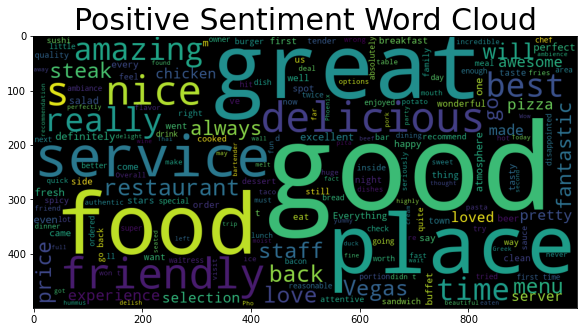

In [30]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text_pos)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title('Positive Sentiment Word Cloud', fontsize=30)

### Negative Sentiment

In [24]:
stopwords=set(STOPWORDS)
tot_text_neg=(''.join(neg['Review']))
print('Total Text Length :', len(tot_text_neg))

Total Text Length : 30304


In [31]:
# remove except a-z, A-Z, replace with space, in total text

import re
total_text_neg = re.sub('[^a-zA-Z]',' ',tot_text_neg) 

# bcs there are many of extra spaces, remove it
# remove extra spaces (' +') with a single space (' ')

total_text_neg = re.sub(' +', ' ', total_text_neg)

Text(0.5, 1.0, 'Negative Sentiment Word Cloud')

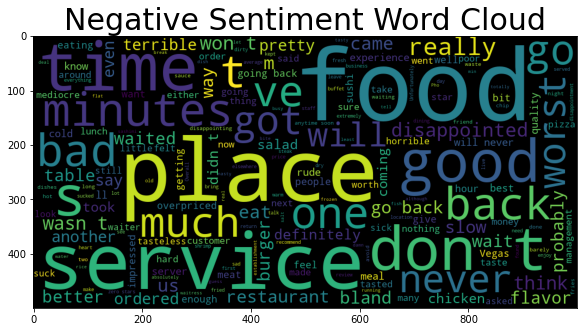

In [33]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text_neg)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.title('Negative Sentiment Word Cloud', fontsize=30)

# Data Spliting

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Review'],
                                                    df['Liked'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800,), (200,), (800,), (200,))

# Modeling

In [9]:
# Import Libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

## Basic Modeling

In [10]:
lr = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", LogisticRegression())])
dt = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", DecisionTreeClassifier())])
rf = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier())])
ab = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", AdaBoostClassifier())])
gb = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", GradientBoostingClassifier())])
xg = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", XGBClassifier())])

# Train the Model
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
ab.fit(x_train, y_train)
gb.fit(x_train, y_train)
xg.fit(x_train, y_train)

# Predictions for the X test
y_pred_lr = lr.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_ab = lr.predict(x_test)
y_pred_gb = gb.predict(x_test)
y_pred_xg = xg.predict(x_test)

[12:30:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [11]:
abcd = [['Logistic Regression', accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr),
          recall_score(y_test, y_pred_lr), f1_score(y_test, y_pred_lr)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt), precision_score(y_test, y_pred_dt),
          recall_score(y_test, y_pred_dt), f1_score(y_test, y_pred_dt)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf),
          recall_score(y_test, y_pred_rf), f1_score(y_test, y_pred_rf)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab), precision_score(y_test, y_pred_ab),
          recall_score(y_test, y_pred_ab), f1_score(y_test, y_pred_ab)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb), precision_score(y_test, y_pred_gb),
          recall_score(y_test, y_pred_gb), f1_score(y_test, y_pred_gb)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg), precision_score(y_test, y_pred_xg),
          recall_score(y_test, y_pred_xg), f1_score(y_test, y_pred_xg)]]

df_score = pd.DataFrame(abcd,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],dtype=float)
df_score

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.815,0.851064,0.776699,0.812183
1,Decision Tree,0.720,0.742268,0.699029,0.720000
2,Random Forest,0.800,0.862069,0.728155,0.789474
3,Ada Boost,0.815,0.851064,0.776699,0.812183
4,Gradient Boost,0.765,0.818182,0.699029,0.753927
5,XG Boost,0.745,0.765306,0.728155,0.746269


## Hyperparameter

### Logistic Regression

C: 0.001; train: 0.50375; test: 0.485
C: 0.021183673469387754; train: 0.835; test: 0.785
C: 0.04136734693877551; train: 0.8625; test: 0.775
C: 0.061551020408163265; train: 0.87625; test: 0.785
C: 0.08173469387755102; train: 0.8825; test: 0.79
C: 0.10191836734693877; train: 0.89; test: 0.795
C: 0.12210204081632653; train: 0.8975; test: 0.795
C: 0.14228571428571427; train: 0.9; test: 0.795
C: 0.16246938775510203; train: 0.90375; test: 0.8
C: 0.1826530612244898; train: 0.9075; test: 0.8
C: 0.20283673469387753; train: 0.91; test: 0.805
C: 0.2230204081632653; train: 0.91375; test: 0.81
C: 0.24320408163265306; train: 0.915; test: 0.805
C: 0.2633877551020408; train: 0.915; test: 0.805
C: 0.28357142857142853; train: 0.91875; test: 0.805
C: 0.3037551020408163; train: 0.92; test: 0.805
C: 0.32393877551020406; train: 0.92; test: 0.805
C: 0.3441224489795918; train: 0.92; test: 0.81
C: 0.3643061224489796; train: 0.92125; test: 0.815
C: 0.3844897959183673; train: 0.9225; test: 0.815
C: 0.40467346938

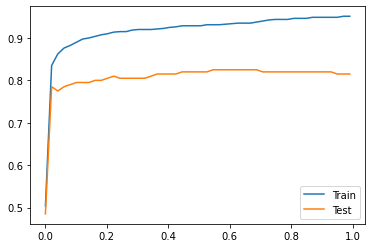

In [20]:
#values = ['none', 'l2', 'l1', 'elasticnet'] # penalty
values = [float(x) for x in np.linspace(start = 0.001, stop = 0.99, num = 50)] # C 

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", LogisticRegression(C=x, random_state=123))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('C: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`C`: 0.021183673469387754; train: 0.835; test: 0.785

penalty: none; train: 1.0; test: 0.825
penalty: l2; train: 0.835; test: 0.785


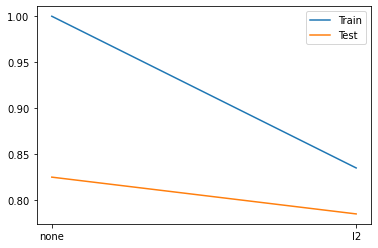

In [23]:
values = ['none', 'l2'] # penalty
#values = [float(x) for x in np.linspace(start = 0.001, stop = 0.99, num = 50)] # C 

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", LogisticRegression(C=0.2230204081632653,
                                                        penalty=x,
                                                        random_state=123))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('penalty: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [54]:
model_lr = Pipeline([("tfidf", TfidfVectorizer()) , 
                     ("classifier", LogisticRegression(C=0.021183673469387754,
                                                       penalty='l2',
                                                       random_state=123))])
    
model_lr.fit(x_train,y_train)
    
# eval on train
y_pred_train_lr = model_lr.predict(x_train)
train_acc_lr = accuracy_score(y_train, y_pred_train_lr)

    
# eval on test
y_pred_test_lr = model_lr.predict(x_test)
test_acc_lr = accuracy_score(y_test, y_pred_test_lr)

print('Accuracy Train Logistic Regression :', train_acc_lr)
print('Accuracy Test Logistic Regression :', test_acc_lr)

Accuracy Train Logistic Regression : 0.835
Accuracy Test Logistic Regression : 0.785


### Adaboost

n_estimators: 3; train: 0.62625; test: 0.595
n_estimators: 5; train: 0.67875; test: 0.64
n_estimators: 7; train: 0.7; test: 0.655
n_estimators: 10; train: 0.72; test: 0.665
n_estimators: 12; train: 0.7375; test: 0.645
n_estimators: 15; train: 0.75125; test: 0.64
n_estimators: 17; train: 0.76375; test: 0.655
n_estimators: 20; train: 0.77625; test: 0.67
n_estimators: 22; train: 0.78625; test: 0.68
n_estimators: 25; train: 0.79875; test: 0.69
n_estimators: 27; train: 0.805; test: 0.705
n_estimators: 30; train: 0.8075; test: 0.705
n_estimators: 32; train: 0.81625; test: 0.71
n_estimators: 35; train: 0.83125; test: 0.745
n_estimators: 37; train: 0.835; test: 0.745
n_estimators: 40; train: 0.84875; test: 0.735
n_estimators: 42; train: 0.8575; test: 0.735
n_estimators: 45; train: 0.85875; test: 0.73
n_estimators: 47; train: 0.86375; test: 0.73
n_estimators: 50; train: 0.87; test: 0.73
n_estimators: 52; train: 0.87125; test: 0.73
n_estimators: 55; train: 0.8725; test: 0.73
n_estimators: 57; tr

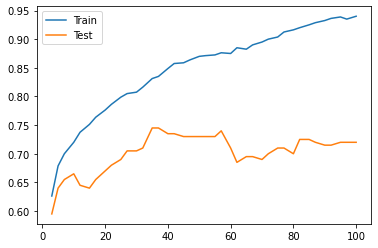

In [27]:
values = [int(x) for x in np.linspace(start = 3, stop = 100, num = 40)] # n_estimators
#values = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)] # learning_rate
#values = ['SAMME', 'SAMME.R'] # algorithm

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", AdaBoostClassifier(n_estimators=x,
                                                        random_state=123))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`n_estimators`: 57; train: 0.87625; test: 0.74

learning_rate: 0.001; train: 0.5775; test: 0.58
learning_rate: 0.03510344827586207; train: 0.71125; test: 0.655
learning_rate: 0.06920689655172414; train: 0.75125; test: 0.7
learning_rate: 0.10331034482758622; train: 0.7725; test: 0.71
learning_rate: 0.13741379310344828; train: 0.795; test: 0.72
learning_rate: 0.17151724137931035; train: 0.80875; test: 0.715
learning_rate: 0.20562068965517244; train: 0.8175; test: 0.72
learning_rate: 0.2397241379310345; train: 0.83375; test: 0.73
learning_rate: 0.27382758620689657; train: 0.83375; test: 0.76
learning_rate: 0.30793103448275866; train: 0.84; test: 0.78
learning_rate: 0.3420344827586207; train: 0.83625; test: 0.755
learning_rate: 0.3761379310344828; train: 0.84625; test: 0.74
learning_rate: 0.4102413793103449; train: 0.845; test: 0.745
learning_rate: 0.4443448275862069; train: 0.85375; test: 0.725
learning_rate: 0.478448275862069; train: 0.85625; test: 0.73
learning_rate: 0.512551724137931; train: 0.85; test: 0.745
learning_rate: 0.546655

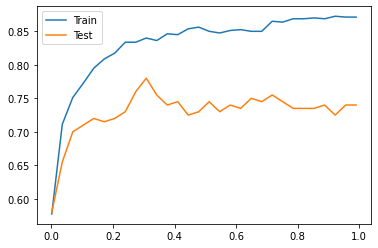

In [29]:
#values = [int(x) for x in np.linspace(start = 3, stop = 100, num = 40)] # n_estimators
values = [float(x) for x in np.linspace(start = 0.001, stop = 0.99, num = 30)] # learning_rate
#values = ['SAMME', 'SAMME.R'] # algorithm

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", AdaBoostClassifier(n_estimators=57,
                                                        random_state=123,
                                                        learning_rate=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('learning_rate: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`learning_rate`: 0.27382758620689657; train: 0.83375; test: 0.76

algorithm: SAMME; train: 0.66875; test: 0.63
algorithm: SAMME.R; train: 0.83375; test: 0.76


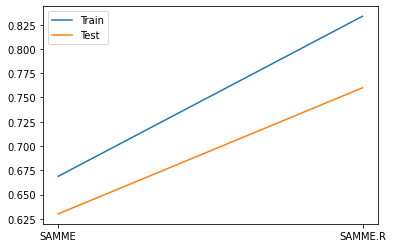

In [30]:
#values = [int(x) for x in np.linspace(start = 3, stop = 100, num = 40)] # n_estimators
#values = [float(x) for x in np.linspace(start = 0.001, stop = 0.99, num = 30)] # learning_rate
values = ['SAMME', 'SAMME.R'] # algorithm

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", AdaBoostClassifier(n_estimators=57,
                                                        random_state=123,
                                                        learning_rate=0.27382758620689657,
                                                        algorithm=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('algorithm: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [31]:
model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", AdaBoostClassifier(n_estimators=57,
                                                        random_state=123,
                                                        learning_rate=0.27382758620689657,
                                                        algorithm='SAMME.R'))])
    
model.fit(x_train,y_train)
    
# eval on train
y_pred_train_ab = model.predict(x_train)
train_acc_ab = accuracy_score(y_train, y_pred_train_ab)
    
    
# eval on test
y_pred_test_ab = model.predict(x_test)
test_acc_ab = accuracy_score(y_test, y_pred_test_ab)

print('Adaboost Train Accuracy Score :', train_acc_ab)
print('Adaboost Test Accuracy Score :', test_acc_ab)
   

Adaboost Train Accuracy Score : 0.83375
Adaboost Test Accuracy Score : 0.76


### Random Forest

max_depth: 1; train: 0.72625; test: 0.66
max_depth: 2; train: 0.80125; test: 0.7
max_depth: 3; train: 0.7975; test: 0.705
max_depth: 4; train: 0.83375; test: 0.74
max_depth: 5; train: 0.8475; test: 0.715
max_depth: 6; train: 0.8625; test: 0.74
max_depth: 7; train: 0.8775; test: 0.755
max_depth: 8; train: 0.89125; test: 0.735
max_depth: 9; train: 0.895; test: 0.75
max_depth: 10; train: 0.9; test: 0.745
max_depth: 11; train: 0.90125; test: 0.75
max_depth: 12; train: 0.91; test: 0.765
max_depth: 13; train: 0.92; test: 0.75
max_depth: 14; train: 0.9275; test: 0.785
max_depth: 15; train: 0.925; test: 0.75
max_depth: 16; train: 0.9425; test: 0.765
max_depth: 17; train: 0.93875; test: 0.735
max_depth: 18; train: 0.94375; test: 0.745
max_depth: 19; train: 0.95125; test: 0.74
max_depth: 20; train: 0.955; test: 0.765
max_depth: 21; train: 0.9475; test: 0.78
max_depth: 22; train: 0.9525; test: 0.78
max_depth: 23; train: 0.96375; test: 0.75
max_depth: 24; train: 0.9625; test: 0.75
max_depth: 25; t

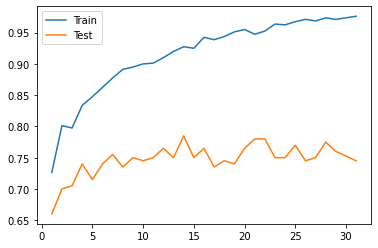

In [33]:
values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=x,
                                                            random_state=123))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('max_depth: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`max_depth`: 21; train: 0.9475; test: 0.78

min_samples_split: 2; train: 0.9475; test: 0.78
min_samples_split: 4; train: 0.94; test: 0.76
min_samples_split: 7; train: 0.94; test: 0.775
min_samples_split: 10; train: 0.9425; test: 0.775
min_samples_split: 13; train: 0.9325; test: 0.76
min_samples_split: 16; train: 0.92; test: 0.765
min_samples_split: 19; train: 0.92125; test: 0.765
min_samples_split: 22; train: 0.9175; test: 0.76
min_samples_split: 25; train: 0.915; test: 0.755
min_samples_split: 27; train: 0.9175; test: 0.76
min_samples_split: 30; train: 0.915; test: 0.76
min_samples_split: 33; train: 0.905; test: 0.765
min_samples_split: 36; train: 0.90375; test: 0.765
min_samples_split: 39; train: 0.90375; test: 0.765
min_samples_split: 42; train: 0.9025; test: 0.765
min_samples_split: 45; train: 0.90125; test: 0.76
min_samples_split: 48; train: 0.90125; test: 0.755
min_samples_split: 51; train: 0.8975; test: 0.755
min_samples_split: 53; train: 0.89625; test: 0.755
min_samples_split: 56; train: 0.8975; test: 0.755
min_samples_s

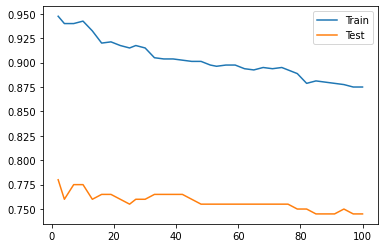

In [34]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=21,
                                                            min_samples_split=x,
                                                            random_state=123))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('min_samples_split: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_split`: 51; train: 0.8975; test: 0.755

min_samples_leaf: 1; train: 0.8975; test: 0.755
min_samples_leaf: 2; train: 0.89125; test: 0.745
min_samples_leaf: 4; train: 0.84625; test: 0.74
min_samples_leaf: 5; train: 0.82875; test: 0.745
min_samples_leaf: 7; train: 0.8; test: 0.725
min_samples_leaf: 9; train: 0.75875; test: 0.705
min_samples_leaf: 10; train: 0.75625; test: 0.71
min_samples_leaf: 12; train: 0.74; test: 0.695
min_samples_leaf: 14; train: 0.7275; test: 0.665
min_samples_leaf: 15; train: 0.72875; test: 0.655
min_samples_leaf: 17; train: 0.71; test: 0.66
min_samples_leaf: 18; train: 0.71; test: 0.65
min_samples_leaf: 20; train: 0.7125; test: 0.645
min_samples_leaf: 22; train: 0.70875; test: 0.645
min_samples_leaf: 23; train: 0.69875; test: 0.635
min_samples_leaf: 25; train: 0.6875; test: 0.655
min_samples_leaf: 27; train: 0.665; test: 0.64
min_samples_leaf: 28; train: 0.6525; test: 0.62
min_samples_leaf: 30; train: 0.65125; test: 0.635
min_samples_leaf: 31; train: 0.65375; test: 0.63
min_samples_leaf: 33; train: 0.63

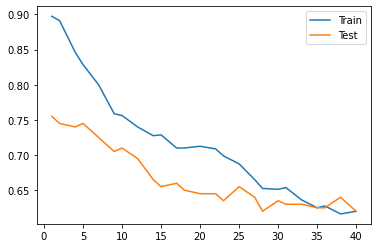

In [35]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=21,
                                                            min_samples_split=51,
                                                            random_state=123,
                                                            min_samples_leaf=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('min_samples_leaf: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`min_samples_leaf`: 5; train: 0.82875; test: 0.745

criterion: gini; train: 0.82875; test: 0.745
criterion: entropy; train: 0.85; test: 0.75


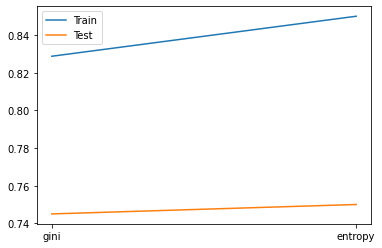

In [36]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=21,
                                                            min_samples_split=51,
                                                            random_state=123,
                                                            min_samples_leaf=5,
                                                            criterion=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('criterion: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`criterion`: gini; train: 0.82875; test: 0.745

n_estimators: 8; train: 0.76875; test: 0.63
n_estimators: 15; train: 0.795; test: 0.695
n_estimators: 22; train: 0.80625; test: 0.72
n_estimators: 30; train: 0.815; test: 0.705
n_estimators: 37; train: 0.81875; test: 0.71
n_estimators: 45; train: 0.82875; test: 0.72
n_estimators: 52; train: 0.82; test: 0.72
n_estimators: 60; train: 0.835; test: 0.725
n_estimators: 67; train: 0.81875; test: 0.735
n_estimators: 75; train: 0.815; test: 0.745
n_estimators: 82; train: 0.82; test: 0.745
n_estimators: 90; train: 0.825; test: 0.75
n_estimators: 97; train: 0.82625; test: 0.745
n_estimators: 105; train: 0.82875; test: 0.765
n_estimators: 112; train: 0.83625; test: 0.755
n_estimators: 120; train: 0.83625; test: 0.755
n_estimators: 127; train: 0.8425; test: 0.745
n_estimators: 135; train: 0.8325; test: 0.745
n_estimators: 142; train: 0.83375; test: 0.735
n_estimators: 150; train: 0.83625; test: 0.74
n_estimators: 157; train: 0.8375; test: 0.73
n_estimators: 165; train: 0.8375; test: 0.735
n_estima

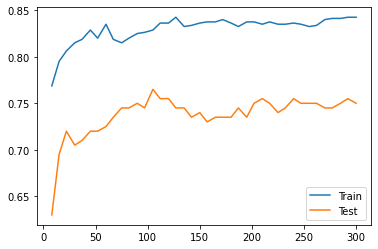

In [37]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
values = [int(x) for x in np.linspace(start = 8, stop = 300, num = 40)] # n_estimators
#values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=21,
                                                            min_samples_split=51,
                                                            random_state=123,
                                                            min_samples_leaf=5,
                                                            criterion='gini',
                                                            n_estimators=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('n_estimators: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

`n_estimators`: 105; train: 0.82875; test: 0.765

max_features: auto; train: 0.82875; test: 0.765
max_features: sqrt; train: 0.82875; test: 0.765
max_features: log2; train: 0.76125; test: 0.64


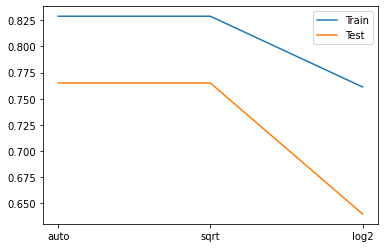

In [38]:
#values = [int(x) for x in np.linspace(start=1, stop=31, num=30)] # max_depth
#values = [int(x) for x in np.linspace(start=2, stop=100, num=35)] # min_samples_split
#values = [int(x) for x in np.linspace(start=1, stop=40, num=25)] # min_samples_leaf
#values = ['gini', 'entropy'] # criterion
#values = [int(x) for x in np.linspace(start = 8, stop = 300, num = 40)] # n_estimators
values = ['auto', 'sqrt', 'log2'] #max_features

train_score = []
test_score = []

for x in values :
    model = Pipeline([("tfidf", TfidfVectorizer()) , 
                      ("classifier", RandomForestClassifier(max_depth=21,
                                                            min_samples_split=51,
                                                            random_state=123,
                                                            min_samples_leaf=5,
                                                            criterion='gini',
                                                            n_estimators=105,
                                                            max_features=x))])
    
    model.fit(x_train,y_train)
    
    # eval on train
    y_pred_train = model.predict(x_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_score.append(train_acc)
    
    # eval on test
    y_pred_test = model.predict(x_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_score.append(test_acc)
    
    print('max_features: ' + str(x) + '; train: ' + str(train_acc) + '; test: ' + str(test_acc))
    
plt.plot(values, train_score, label='Train')
plt.plot(values, test_score, label='Test')
plt.legend()
plt.show()

In [40]:
model = Pipeline([("tfidf", TfidfVectorizer()) , 
                  ("classifier", RandomForestClassifier(max_depth=21,
                                                        min_samples_split=51,
                                                        random_state=123,
                                                        min_samples_leaf=5,
                                                        criterion='gini',
                                                        n_estimators=105,
                                                        max_features='auto'))])
    
model.fit(x_train,y_train)
    
# eval on train
y_pred_train_rf = model.predict(x_train)
train_acc_rf = accuracy_score(y_train, y_pred_train_rf)
    
# eval on test
y_pred_test_rf = model.predict(x_test)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print('Random Forest Train Acc Score :', train_acc_rf)
print('Random Forest Test Acc Score :', test_acc_rf)

Random Forest Train Acc Score : 0.82875
Random Forest Test Acc Score : 0.765


### Summary

In [42]:
print('Accuracy Train Logistic Regression :', train_acc_lr)
print('Accuracy Test Logistic Regression :', test_acc_lr)
print('\n')
print('Adaboost Train Accuracy Score :', train_acc_ab)
print('Adaboost Test Accuracy Score :', test_acc_ab)
print('\n')
print('Random Forest Train Acc Score :', train_acc_rf)
print('Random Forest Test Acc Score :', test_acc_rf)

Accuracy Train Logistic Regression : 0.835
Accuracy Test Logistic Regression : 0.785


Adaboost Train Accuracy Score : 0.83375
Adaboost Test Accuracy Score : 0.76


Random Forest Train Acc Score : 0.82875
Random Forest Test Acc Score : 0.765


We will use Logistic Regression 

<AxesSubplot:>

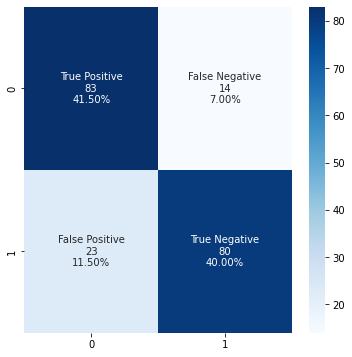

In [43]:
cf_matrix = confusion_matrix(y_test, y_pred_lr)

group_names = ["True Positive", "False Negative", "False Positive", "True Negative"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(6, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [44]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.70      0.96      0.81        97
           1       0.94      0.62      0.75       103

    accuracy                           0.79       200
   macro avg       0.82      0.79      0.78       200
weighted avg       0.83      0.79      0.78       200



# Testing

In [63]:
test1 = ['That was fantastic food, I am so happy to be here!!!']
test2 = ['Soggy and too salty!']
test3 = ['Too expensive, not worth for the price']
test4 = ['We will not be going back to your restaurant!!']
test5 = ['I will be back many times soon, your food is really good and Prices were good']
test6 = ['Hot Ramen Level 5 is so good, it was really amazing']
         
test_group = [test1, test2, test3, test4, test5, test6]

In [64]:
for i in test_group:
    pred = model_lr.predict(i)
    if pred == 0:
        print('This text is Negative Sentiment :')
        print(i)
    else:
        print('This text is Positive Sentiment :')
        print(i)
        
    print('\n')

This text is Negative Sentiment :
['That was fantastic food, I am so happy to be here!!!']


This text is Negative Sentiment :
['Soggy and too salty!']


This text is Negative Sentiment :
['Too expensive, not worth for the price']


This text is Negative Sentiment :
['We will not be going back to your restaurant!!']


This text is Positive Sentiment :
['I will be back many times soon, your food is really good and Prices were good']


This text is Positive Sentiment :
['Hot Ramen Level 5 is so good, it was really amazing']


